In [1]:
!pip install scanpy
!pip install leidenalg
!pip install scvi-tools
!pip install scikit-misc

  Obtaining dependency information for scanpy from https://files.pythonhosted.org/packages/39/d5/992cb22882523b873b981c1bdebbf28baffeb7ac931cd5d60cb53f2d8a24/scanpy-1.9.6-py3-none-any.whl.metadata
  Obtaining dependency information for anndata>=0.7.4 from https://files.pythonhosted.org/packages/8a/87/201514af3bf08db52e11b7d94e6129f0a75503194b81614ff48883101c4c/anndata-0.10.3-py3-none-any.whl.metadata
  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/90.8 kB ? eta -:--:--
     ---------------------------------------- 90.8/90.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for ar

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.31.77 which is incompatible.


  Obtaining dependency information for scikit-misc from https://files.pythonhosted.org/packages/97/1e/3aec0177c5568afaf93053f527a63bf862614ce8f4f1d578bb4f039529c6/scikit_misc-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.0 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/10.0 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/10.0 MB 13.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/10.0 MB 13.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/10.0 MB 13.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/10.0 MB 11.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/10.0 MB 12.7 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/10.0 MB 14.6 MB/s eta 0:00:01
   ------------

In [4]:
pip install botocore==1.29.77

  Using cached botocore-1.29.77-py3-none-any.whl (10.4 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.77
    Uninstalling botocore-1.31.77:
      Successfully uninstalled botocore-1.31.77
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.29.77 which is incompatible.
boto3 1.28.77 requires botocore<1.32.0,>=1.31.77, but you have botocore 1.29.77 which is incompatible.


In [ ]:
!pip install --quiet scvi-tools[tutorials]

In [ ]:
!pip install --quiet gdown

In [5]:
 !pip install --quiet --upgrade seaborn==0.10

In [ ]:
!pip install --quiet bbknn

In [17]:
pip install gseapy

  Obtaining dependency information for gseapy from https://files.pythonhosted.org/packages/5e/9f/ccabc2d990c03e649fb9f8ea45045103c075cf0b648db4f231c0bab0385a/gseapy-1.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/363.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/363.5 kB ? eta -:--:--
   ------------ --------------------------- 112.6/363.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 363.5/363.5 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
### General ###
import os
import random
import logging
import numpy as np
import pandas as pd

In [7]:
### Single-Cell ###
import scvi
import scanpy as sc
import anndata as ad


D:\anaconda\Lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
D:\anaconda\Lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [28]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [8]:
### Visualization ###
from colorama import Fore
import matplotlib.pyplot as plt

### PyTorch Ecosystem ###
import torch

In [9]:
plt.style.use("bmh")


In [10]:
seed = 42

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    scvi.settings.seed = seed # scvi-tools seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(seed)

Global seed set to 42


In [33]:
adata = ad.read_h5ad(r"D:\Baylor\opticnerve\on.h5ad")

KeyError: "Unable to open object (object 'obs' doesn't exist)"

In [28]:
adata

AnnData object with n_obs × n_vars = 771082 × 36601
    obs: 'sampleid'

In [29]:
adata = adata.raw.to_adata()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

AttributeError: 'NoneType' object has no attribute 'to_adata'

In [30]:
sc.pl.umap(adata, color='louvain_0.6')

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [26]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

ranking genes


KeyError: 'louvain_0.6'

         Falling back to preprocessing with `sc.pp.pca` and default params.


D:\anaconda\Lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


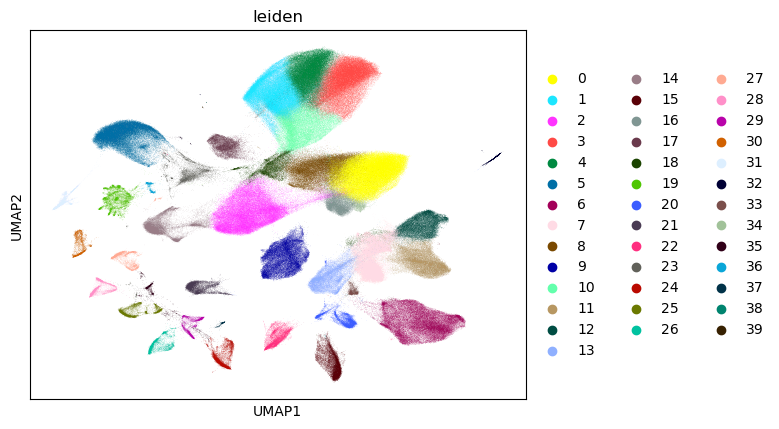

In [4]:
import scanpy as sc
 
adata = sc.read_h5ad(r"D:\Baylor\opticnerve\allopticnerve.h5ad")
adata
 
sc.pp.filter_genes(adata, min_counts=3)
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    )
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
 
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata, min_dist=0.3)
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden')

In [5]:
adata.obs[:5]

sampleid leiden
0  220784onnucom      3
1  220784onnucom      6
2  220784onnucom      6
3  220784onnucom      4
4  220784onnucom      1

In [3]:
adata

AnnData object with n_obs × n_vars = 771082 × 1200
    obs: 'sampleid', 'leiden'
    var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [6]:
sc.tl.leiden(adata)

In [7]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [ ]:
%%R
library(edgeR)
library(MAST)

In [9]:
adata.obs[:5]

sampleid leiden leiden_res0_25 leiden_res0_5 leiden_res1
0  220784onnucom      3              0             1           3
1  220784onnucom      6              5             5           6
2  220784onnucom      6              5             5           6
3  220784onnucom      4              0             1           4
4  220784onnucom      1              0             2           1

D:\anaconda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


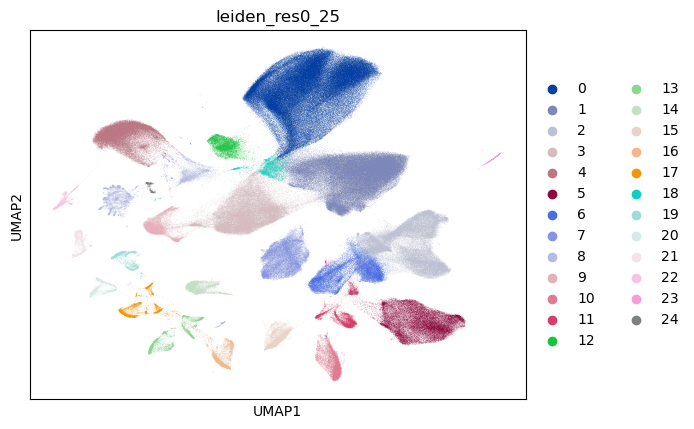

In [12]:
sc.pl.umap(adata, color='leiden_res0_25')

D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

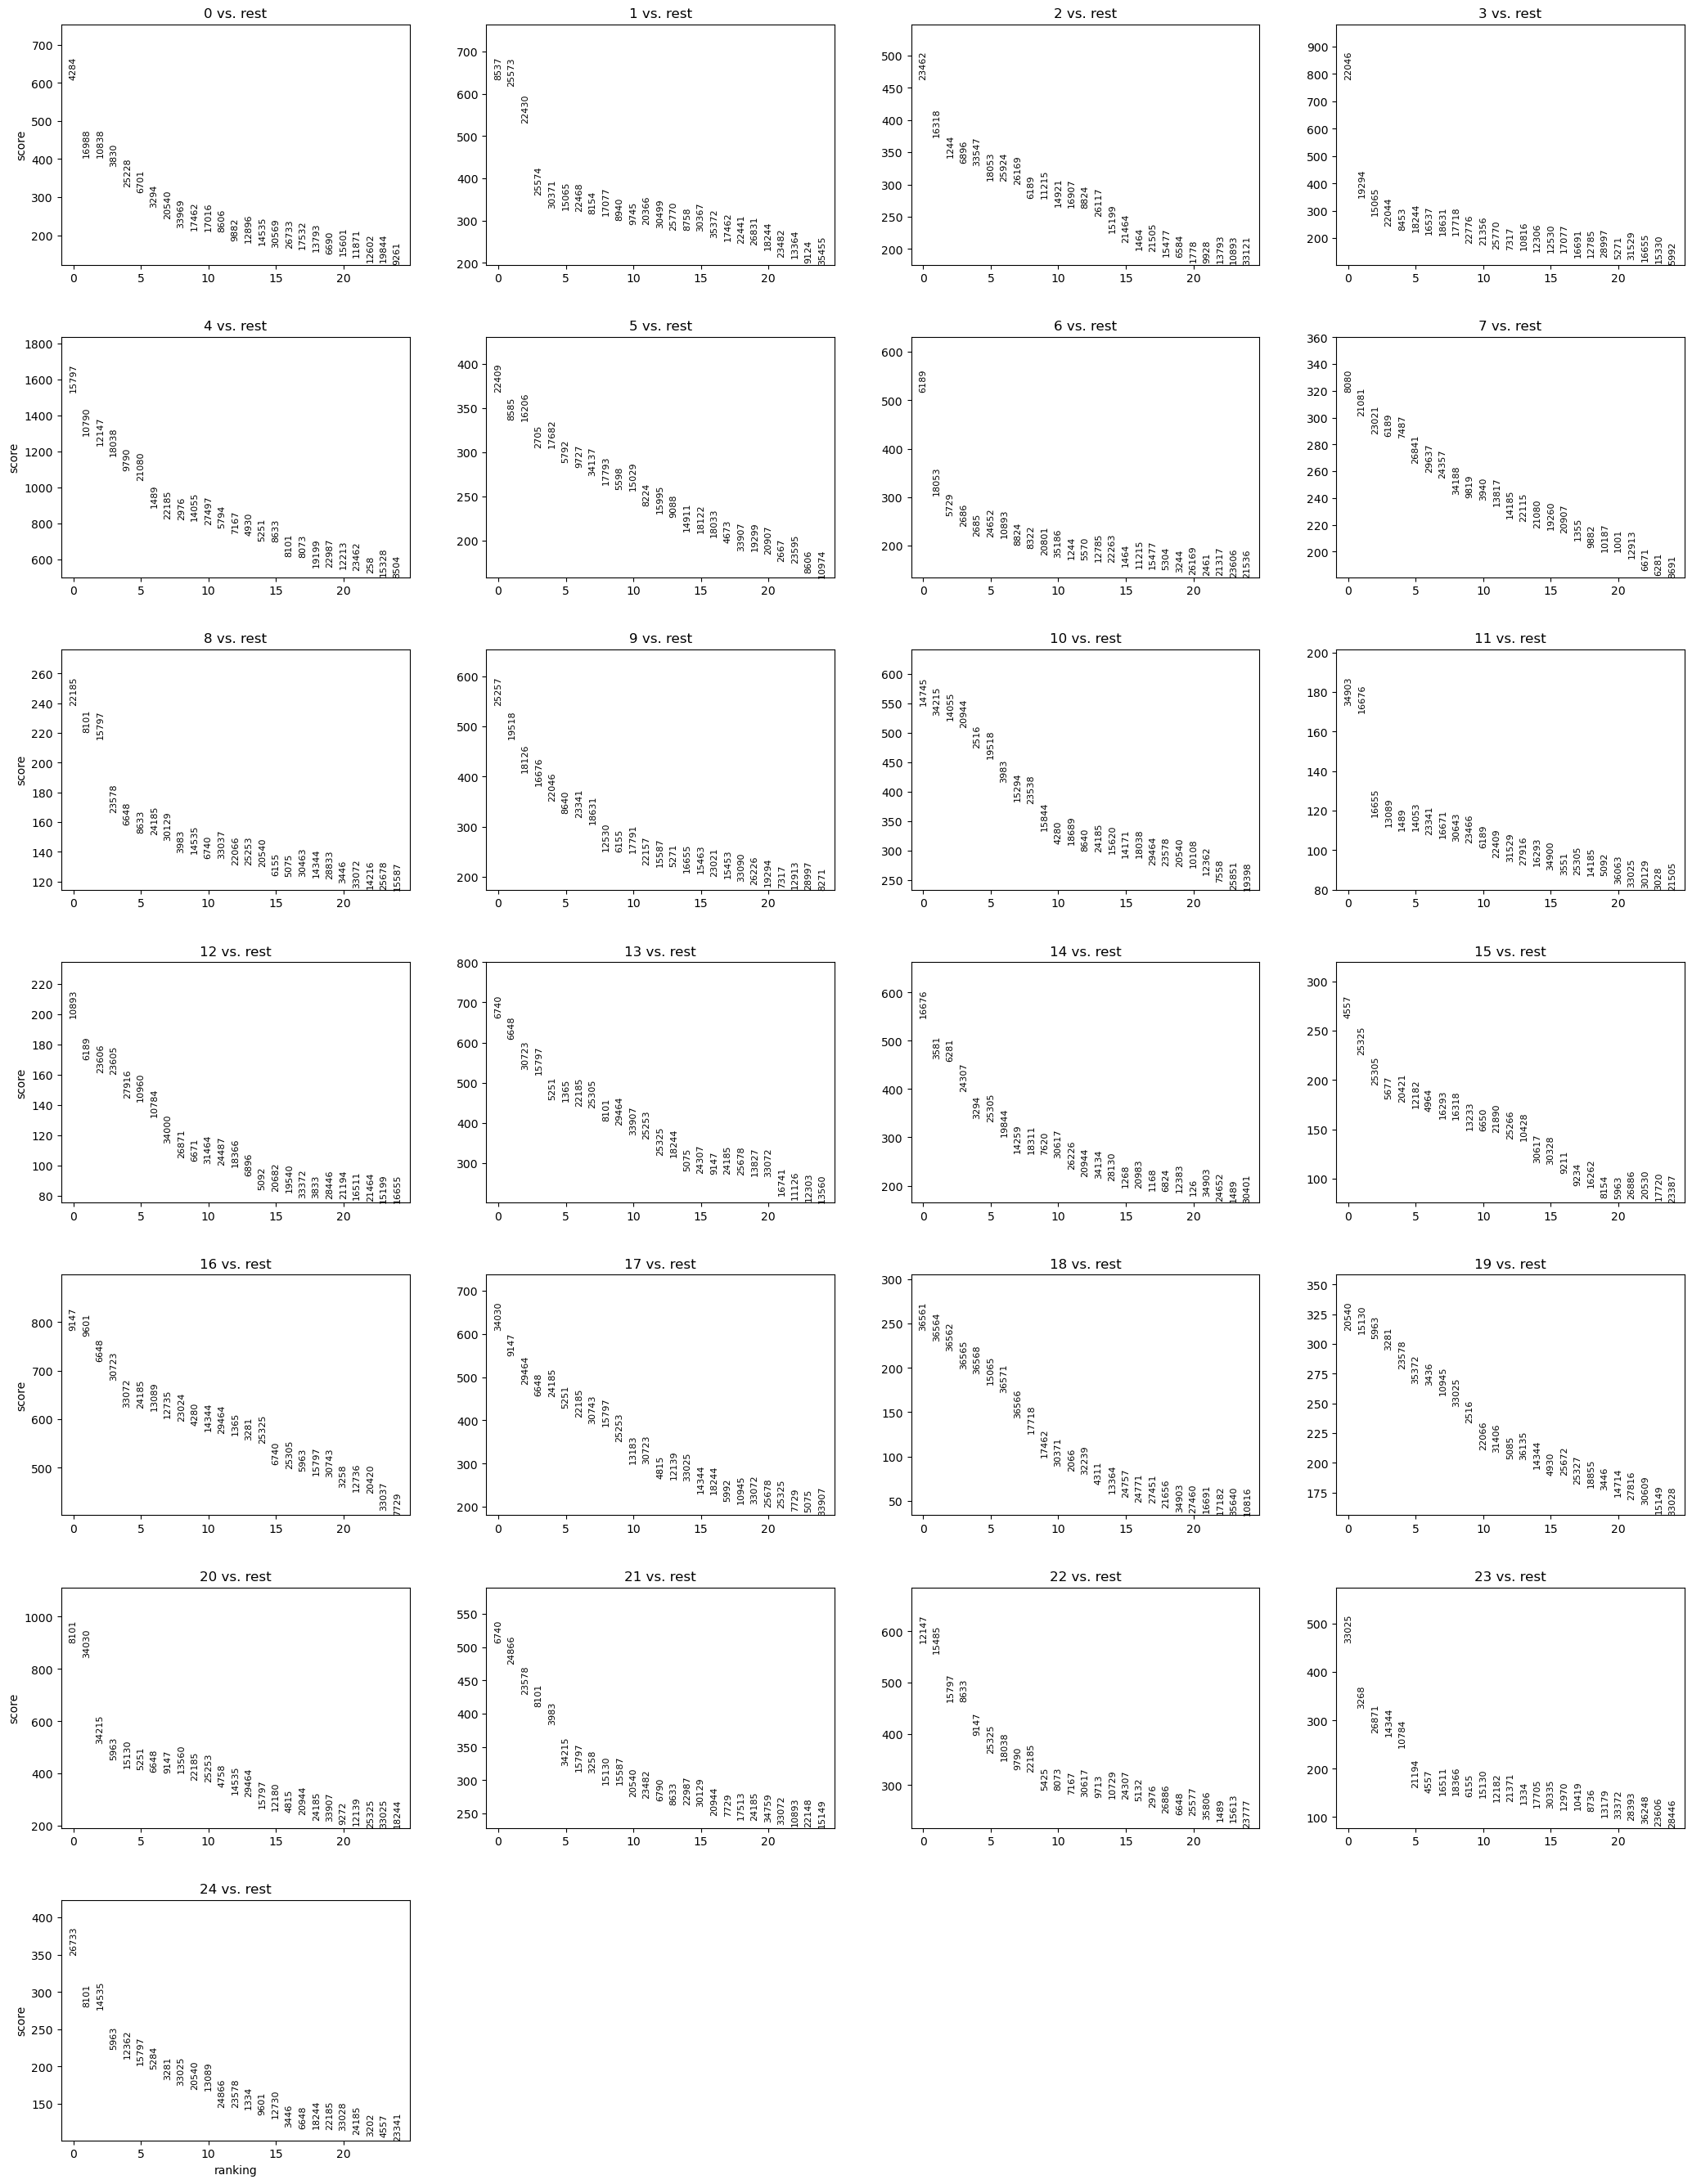

In [13]:
sc.tl.rank_genes_groups(adata, 'leiden_res0_25', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

In [14]:
# results are stored in the adata.uns["t-test"] slot
adata

AnnData object with n_obs × n_vars = 771082 × 1200
    obs: 'sampleid', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1'
    var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'leiden_res0_5_colors', 'leiden_res0_25_colors', 't-test'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

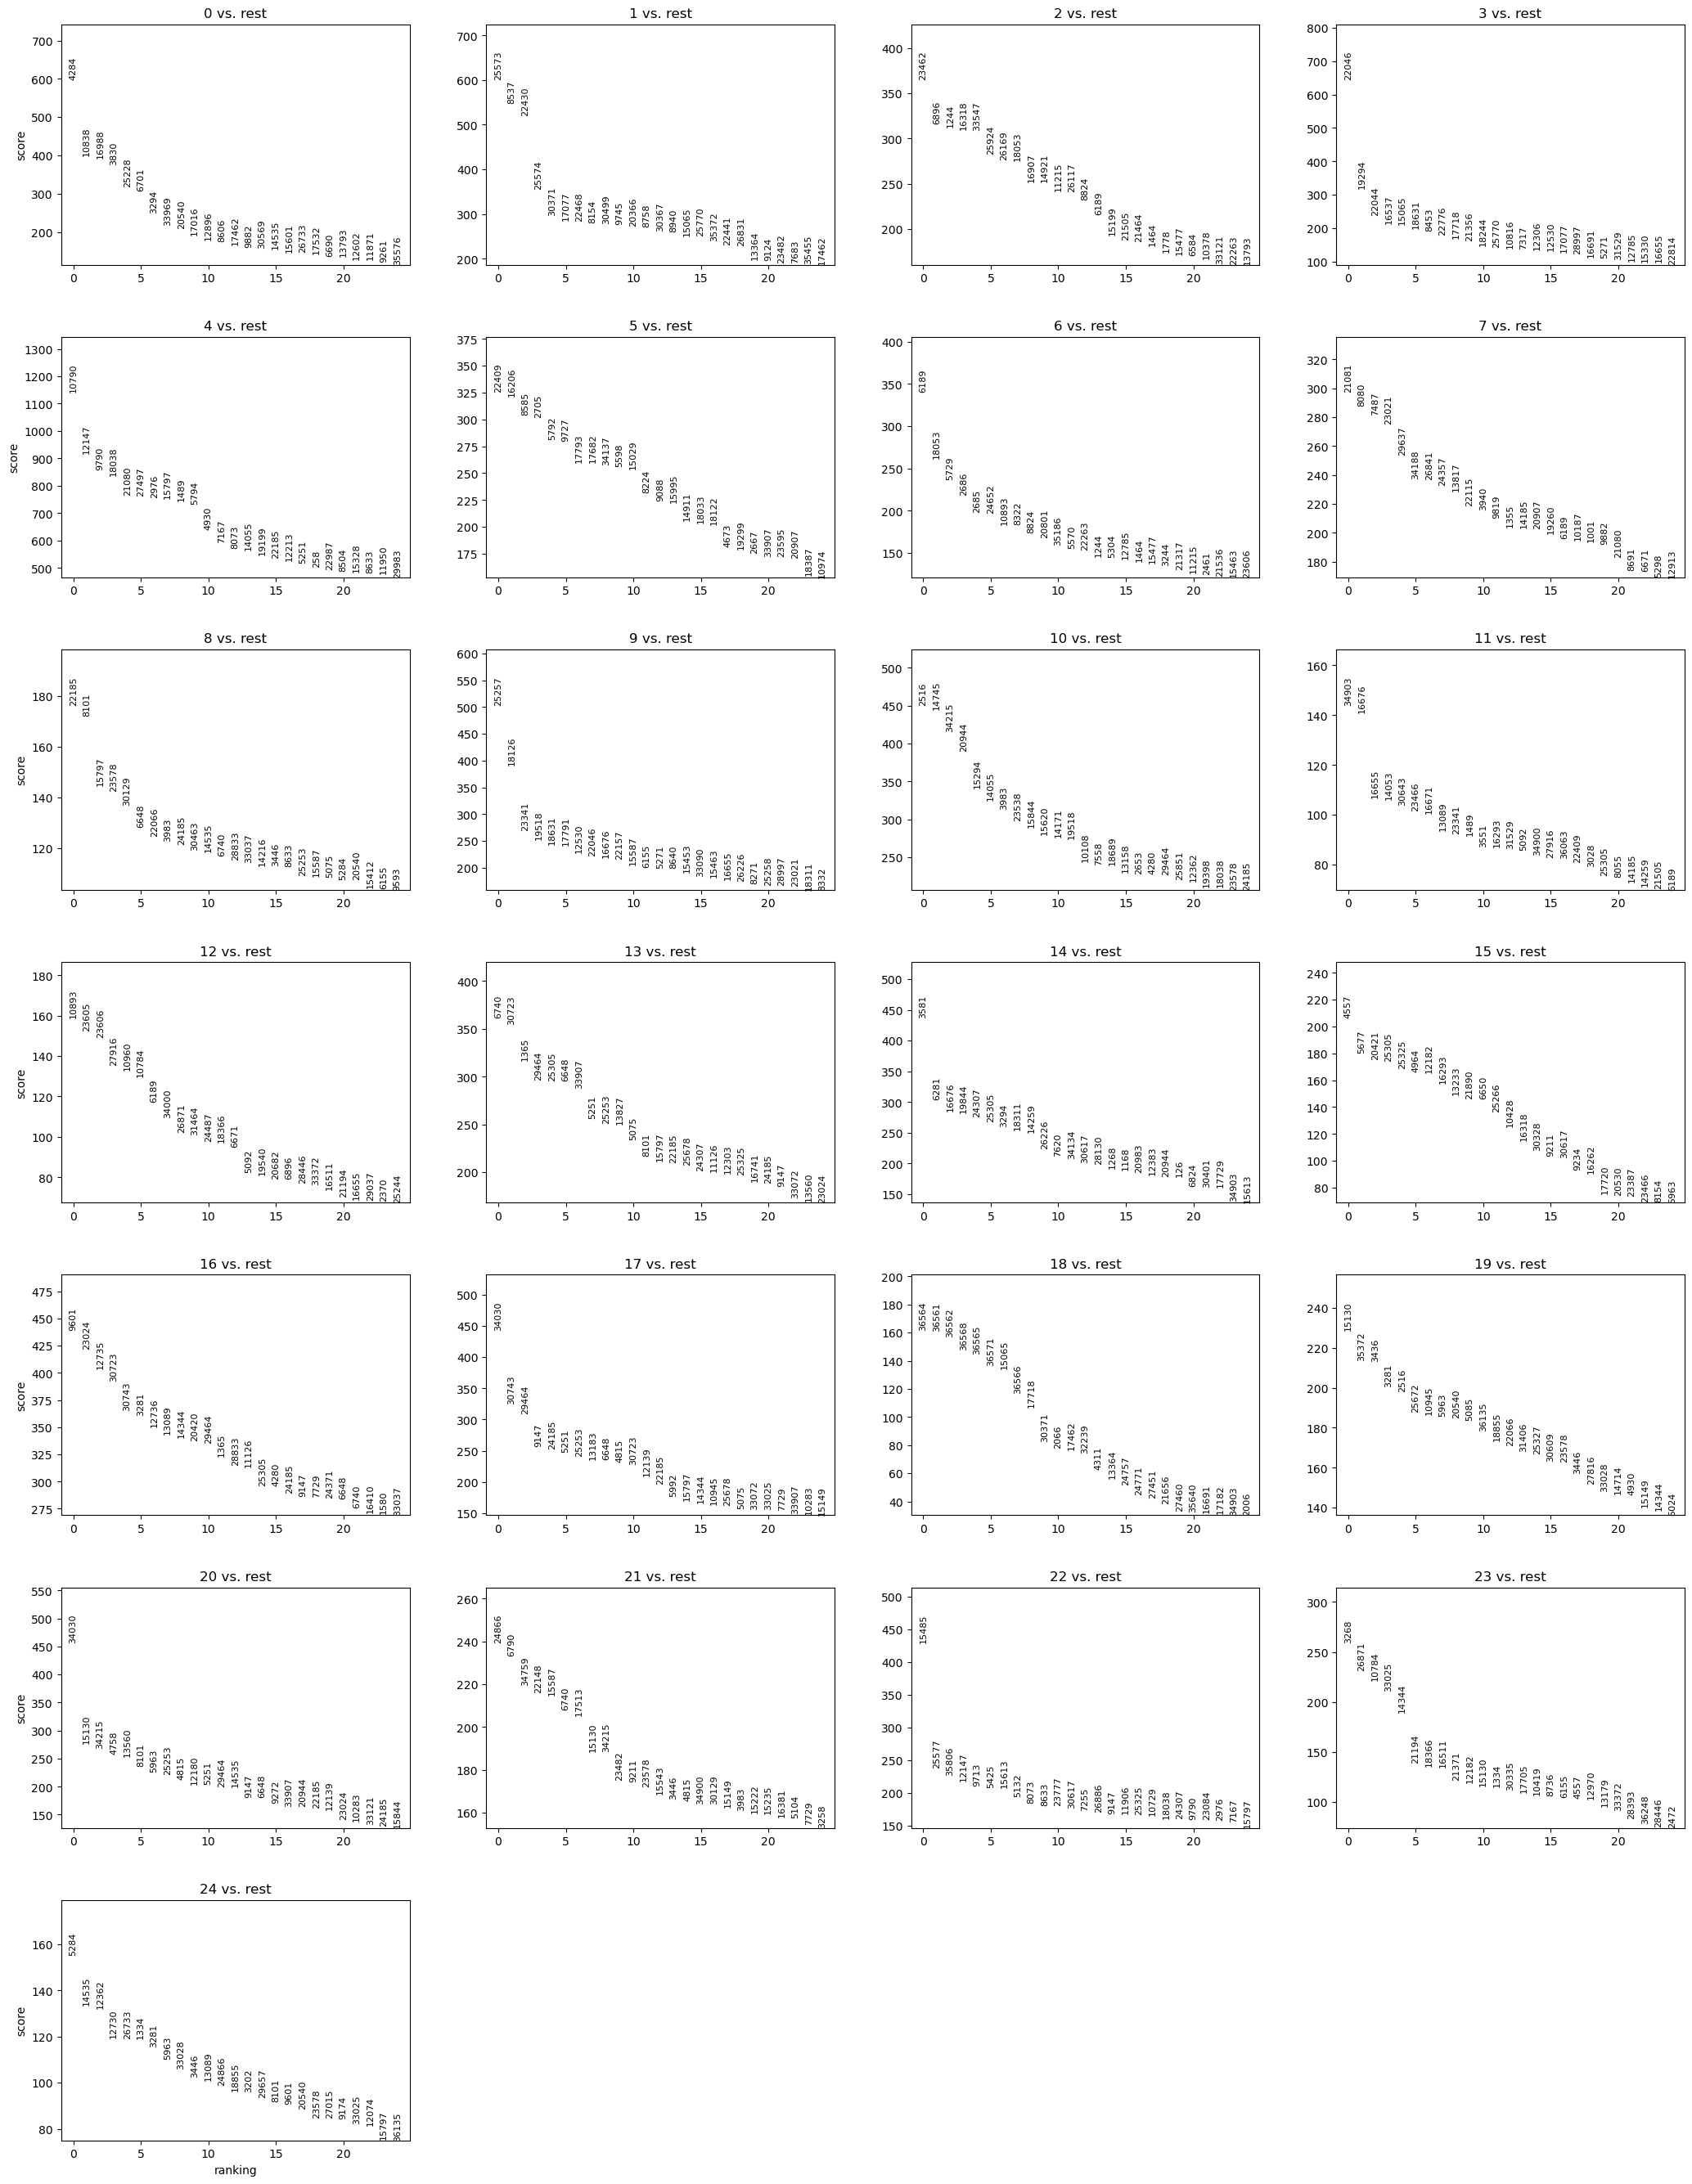

In [16]:
sc.tl.rank_genes_groups(adata, 'leiden_res0_25', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")

D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
D:\anaconda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

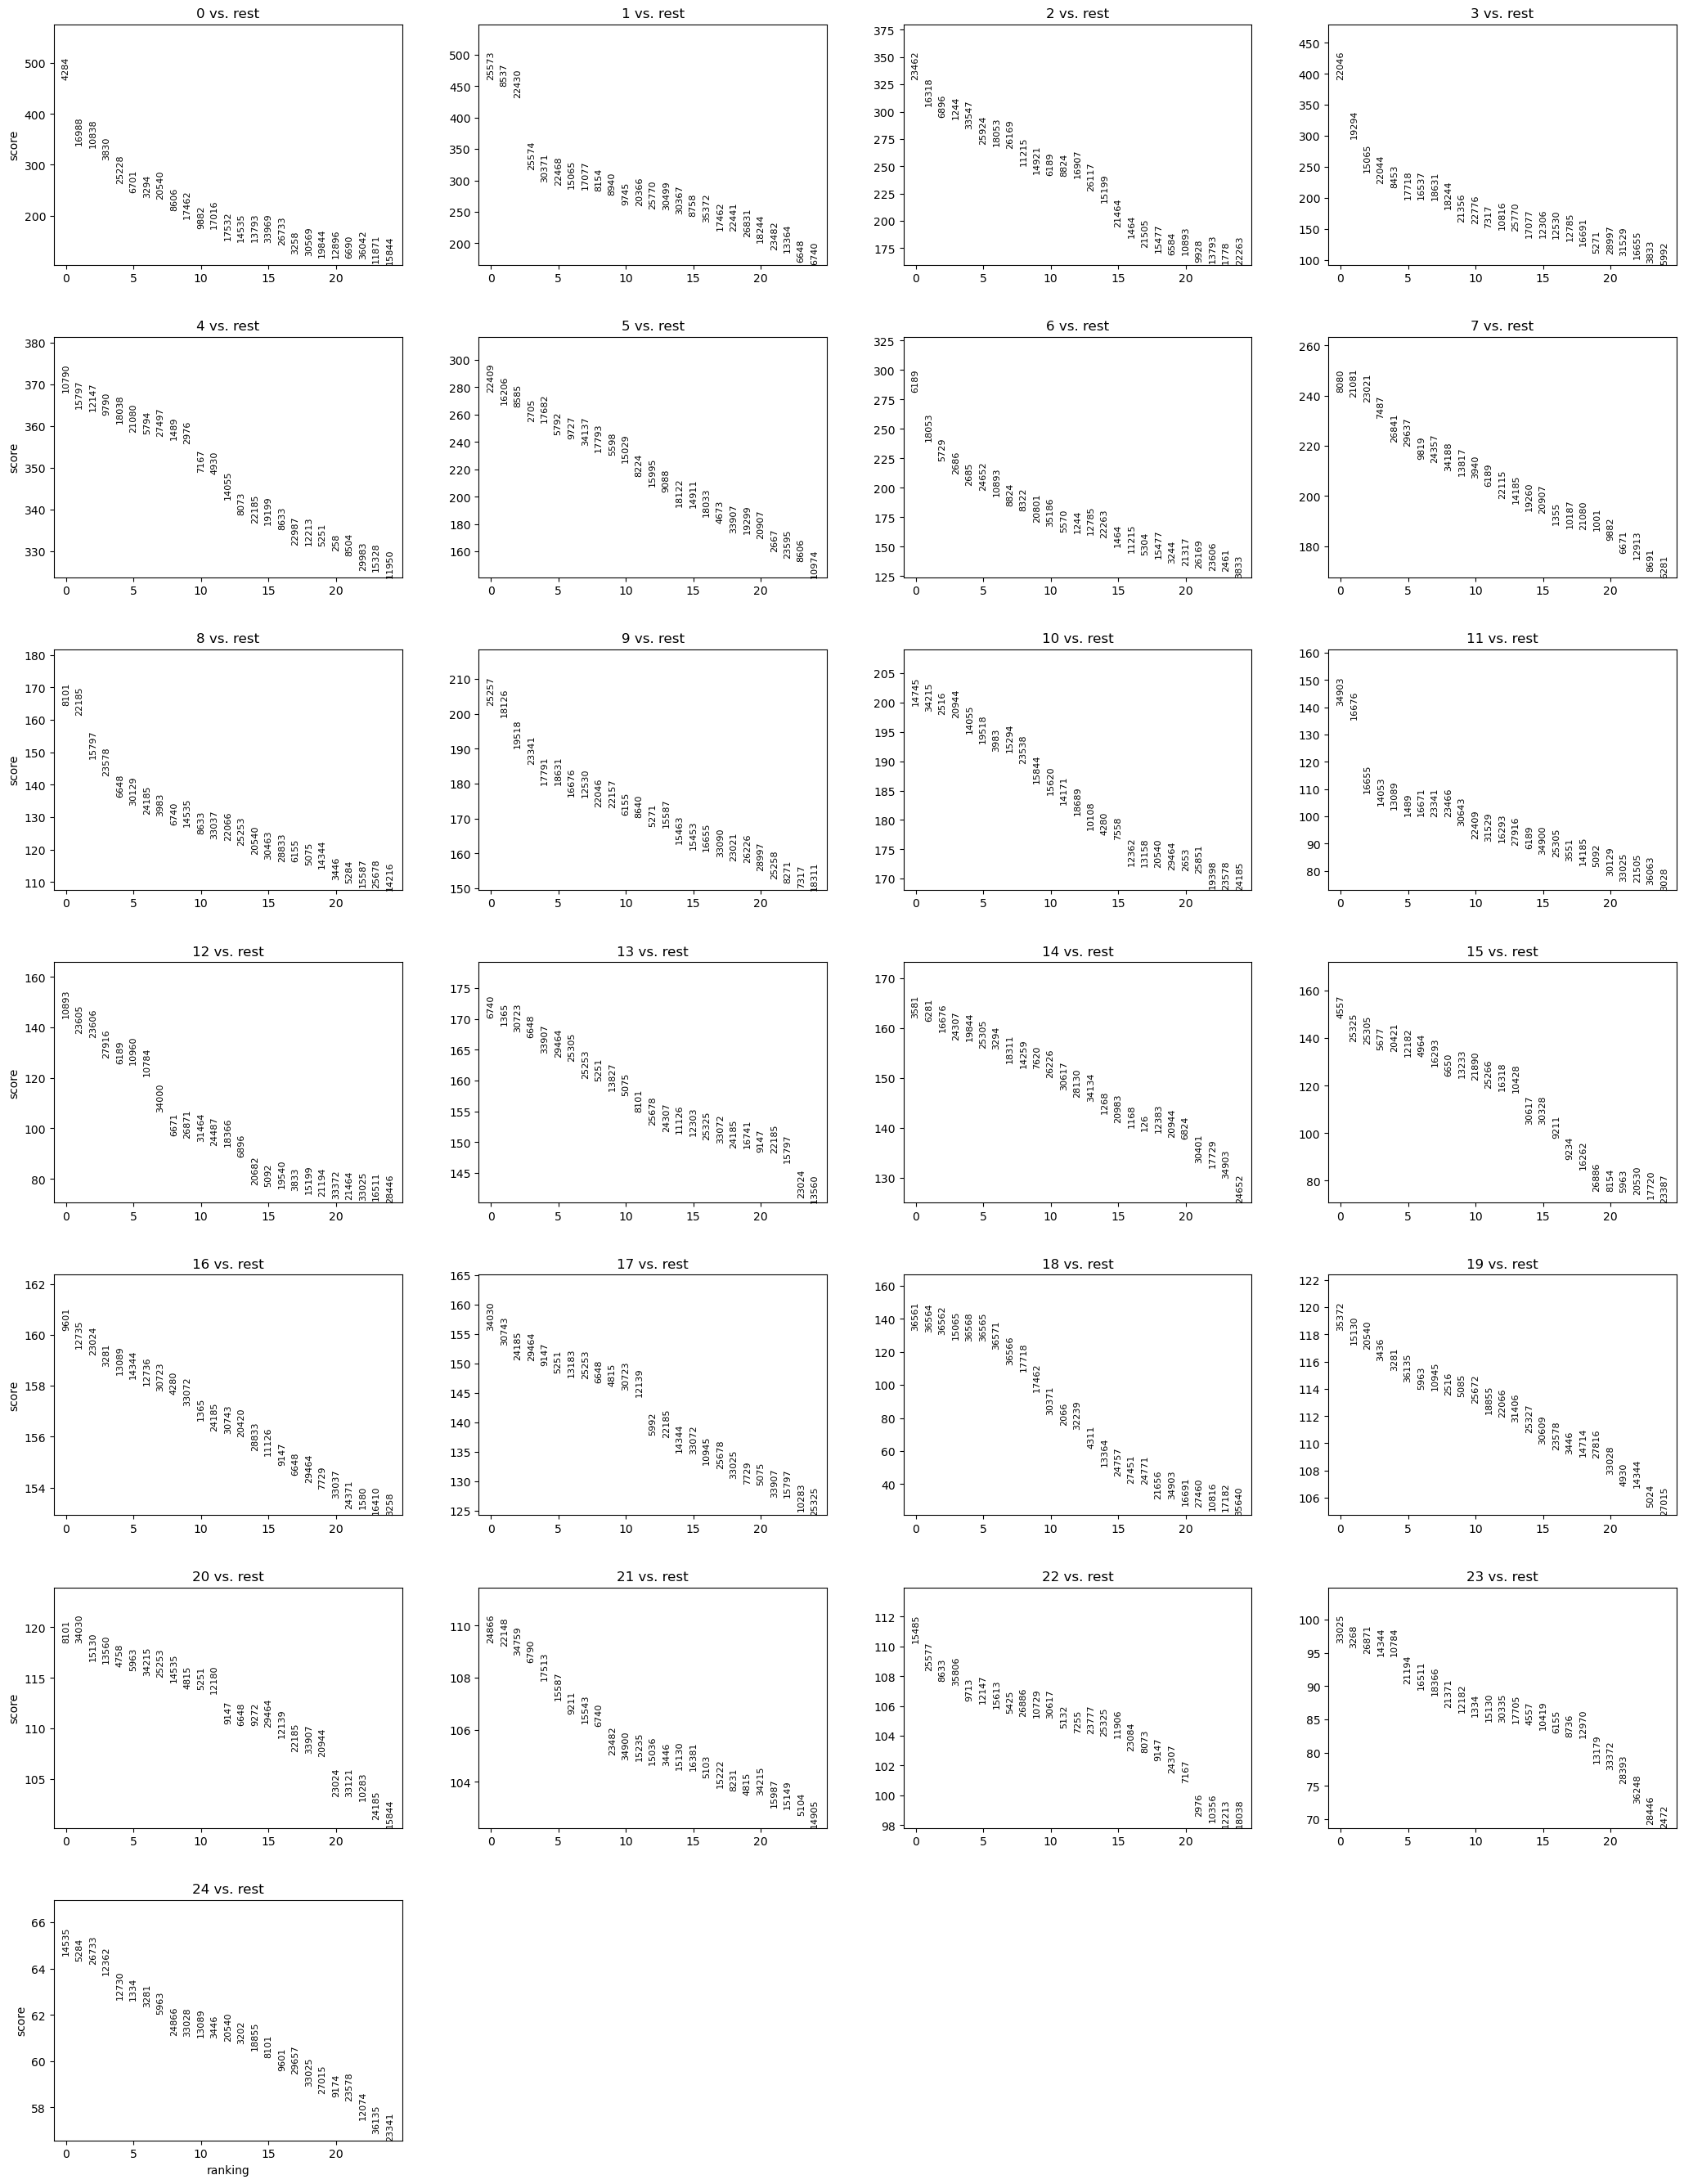

In [17]:
sc.tl.rank_genes_groups(adata, 'leiden_res0_25', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

In [18]:
#compare cluster1 genes, only stores top 100 by default

wc = sc.get.rank_genes_groups_df(adata, group='0', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(adata, group='0', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(adata, group='0', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

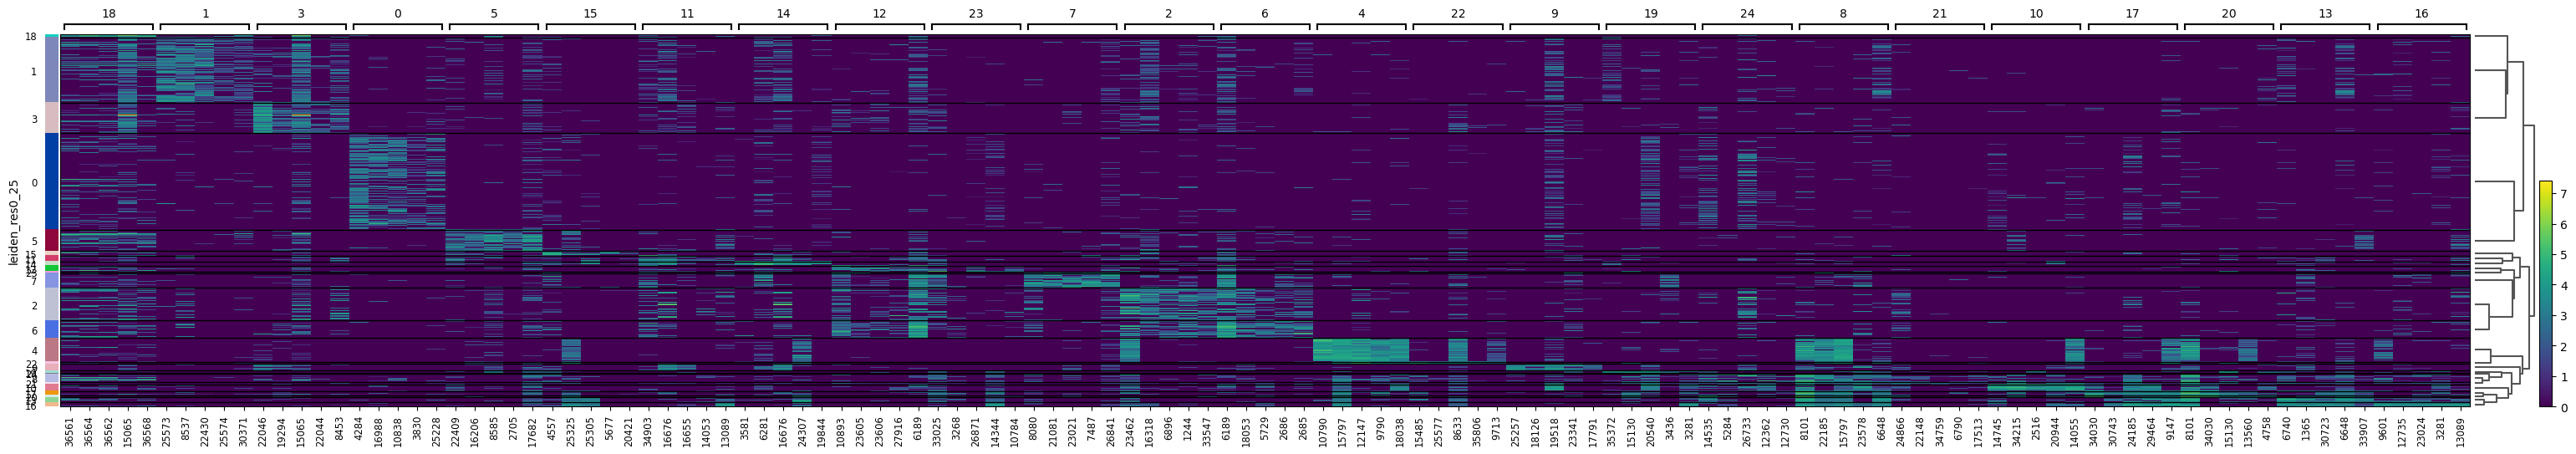

In [19]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden_res0_25", show_gene_labels=True)


D:\anaconda\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


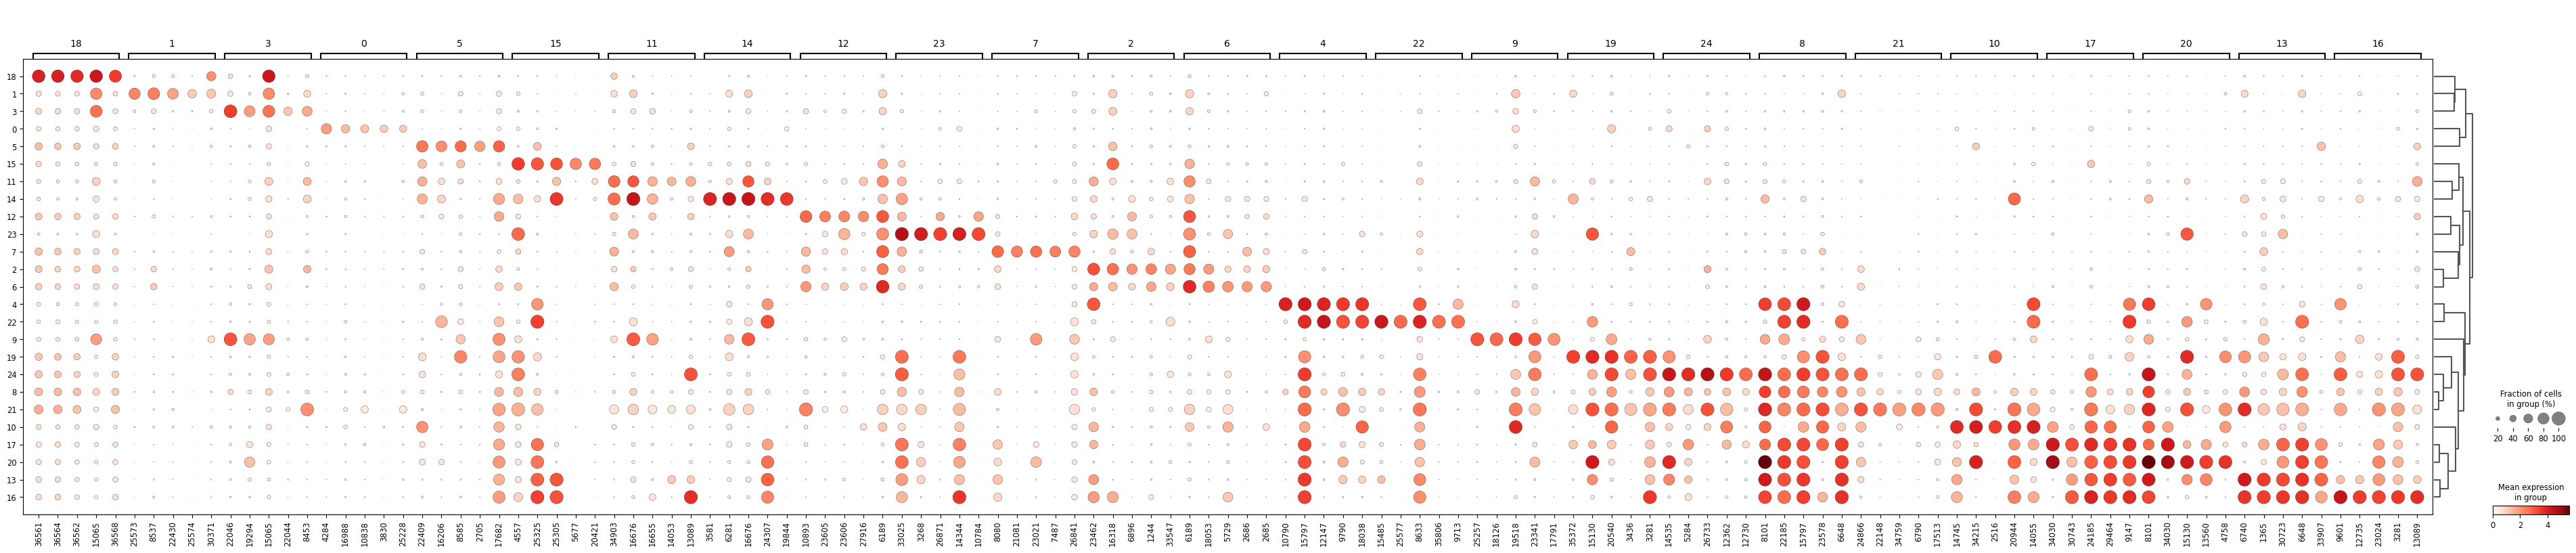

In [20]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="leiden_res0_25")

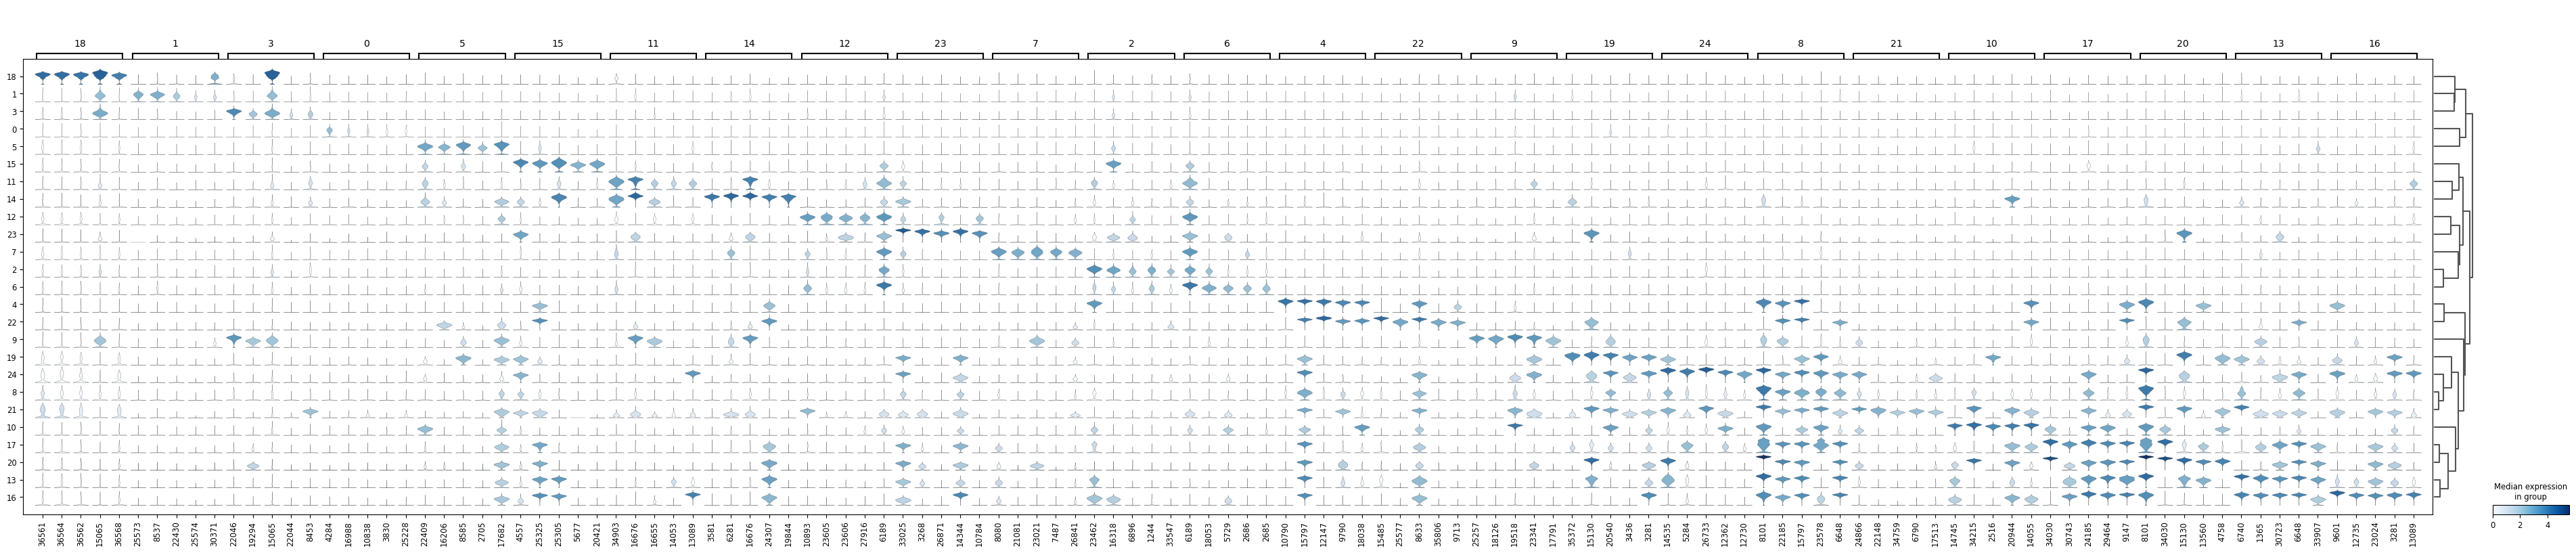

In [21]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="leiden_res0_25")

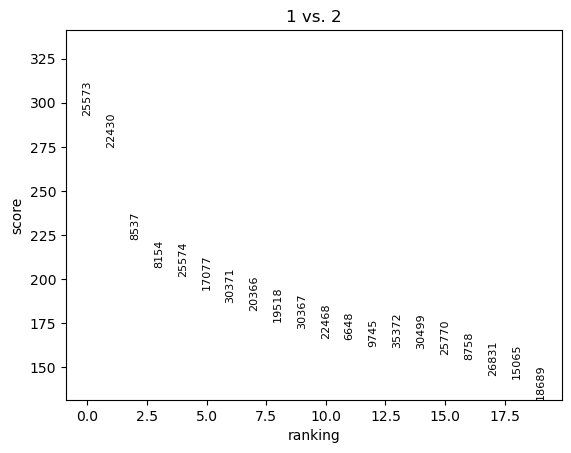

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden_res0_25', groups=['1'], reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1'], n_genes=20)

In [25]:
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=10)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

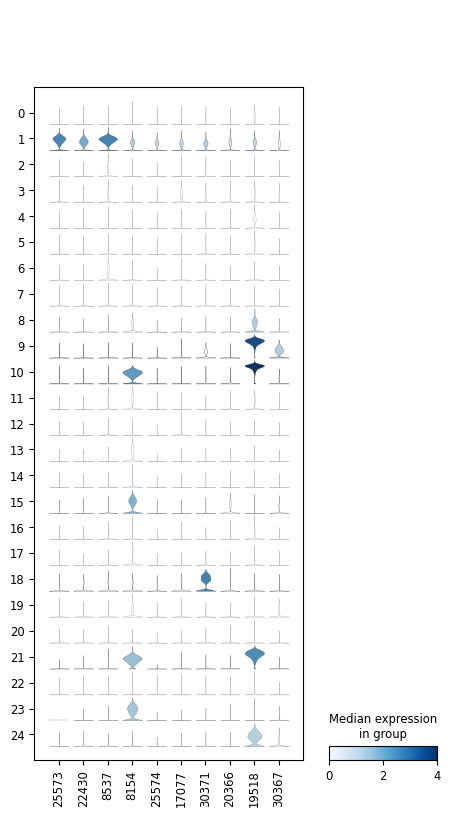

In [26]:
# plot the same genes as violins across all the datasets.

# convert numpy.recarray to list
mynames = [x[0] for x in adata.uns['rank_genes_groups']['names'][:10]]
sc.pl.stacked_violin(adata, mynames, groupby = 'leiden_res0_25')

In [29]:
import gseapy
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(organism='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_202

In [31]:
enr_res = gseapy.enrichr(gene_list=rank_genes_groups,
                     organism='Human',
                     gene_sets='KEGG_2019_Human',
                     cutoff = 0.5)

NameError: name 'rank_genes_groups' is not defined